In [14]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

### Dataset

MAESTRO_small is a dataset class for piano transcription. You can specify the path of the maestro dataset through *path*. *groups* indicates the dataset splits. You can select some of the below and pass them as a list of strings.
```
>>train_set.available_groups()
['train', 'validation', 'test', 'debug']
```
When you create the dataset, it will read all the files (audio, midi) and parse them. Here, we will use `'debug'` dataset, which is a subset of the `'train'` dataset (first 10 pieces).

In [ ]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=None, random_sample=True)

In [ ]:
example_dataset.available_groups()

### Data types
You can treat it as a python list. When you access it with an index, `__getitem__` method will be called.
It will return a python dict which contains the file paths, normalized audios, and piano rolls.

Sample rate of the audio is `16000` and we will use `hop_size=512` for mel-spectrogram and piano roll, resulting in  frame rate of `16000/512 == 31.25`.

In the example below, we examine the shapes of the tensors in the dataset.

In [ ]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

### Piano roll
Piano roll is an array-like representation of notes.
`frame` and `onset` are tensors of shape (*number of frames*, *number of pithces (88)*).

The `frame` represents the sustains of the notes and `onset` marks the attacks of the notes.
Let's suppose there is a piano note of pitch `p` pressed at time `t1` and released at `t2`.  
Then, `frame[t1:t2+1, p] == 1` and `onset[t1, p] == 1`, and `0` everywhere else.


In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='lower')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='lower')


### sequence_length & random_sample
If we specify the `sequence_length`, the dataset trims the audio into the given length. When `random_sample=False`, the segments at the start of the audio will be used. If `random_sample=True`, the segments starting at random position will be used. We will use this attribute to make our training samples stocastic.

if `sequence_length` is not divisible by `HOP_SIZE`, it will shorten the audio for proper adjustment.

In [ ]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=10000, random_sample=True)

In [ ]:
data = example_dataset[1]
print(f'data path: {data["path"]}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='lower')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='lower')


## Visulize GT test samples

Use test

In [3]:
test_dataset = MAESTRO_small(path='../data', groups=['test'], random_sample=False)

Loading 1 group(s) of MAESTRO_small at ../data


Loading group test: 100%|█████████████████████████████████████████| 50/50 [00:09<00:00,  5.17it/s]


In [4]:
for i in range(len(test_dataset)):
    data = test_dataset[i]
    print(f'data {i}: {data["path"]}')

data 0: ../data/2004/MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID--AUDIO_20_R2_2004_12_Track12_wav--1.flac
data 1: ../data/2004/MIDI-Unprocessed_XP_04_R1_2004_03-05_ORIG_MID--AUDIO_04_R1_2004_06_Track06_wav.flac
data 2: ../data/2006/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.flac
data 3: ../data/2006/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_04_Track04_wav.flac
data 4: ../data/2006/MIDI-Unprocessed_03_R1_2006_01-05_ORIG_MID--AUDIO_03_R1_2006_04_Track04_wav.flac
data 5: ../data/2006/MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MID--AUDIO_07_R1_2006_04_Track04_wav.flac
data 6: ../data/2006/MIDI-Unprocessed_24_R1_2006_01-05_ORIG_MID--AUDIO_24_R1_2006_03_Track03_wav.flac
data 7: ../data/2008/MIDI-Unprocessed_04_R1_2008_01-04_ORIG_MID--AUDIO_04_R1_2008_wav--4.flac
data 8: ../data/2008/MIDI-Unprocessed_04_R3_2008_01-07_ORIG_MID--AUDIO_04_R3_2008_wav--3.flac
data 9: ../data/2008/MIDI-Unprocessed_04_R3_2008_01-07_ORIG_MID--AUDIO_04_R3_2008_wav--6

In [23]:
data = test_dataset[40]
print(f'data path: {data["path"]}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

data path: ../data/2015/MIDI-Unprocessed_R2_D2-12-13-15_mid--AUDIO-from_mp3_13_R2_2015_wav--4.flac
audio_shape: torch.Size([10353664])
frame_roll_shape: torch.Size([20222, 88])
onset_roll_shape: torch.Size([20222, 88])


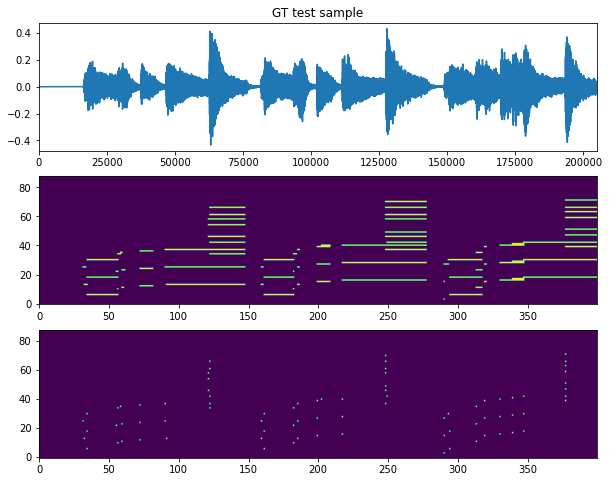

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(311).set_title('GT test sample')
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='lower')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='lower')


## Visualize prediction results

Use debug

In [17]:
import pretty_midi
import soundfile
import torch
import numpy as np
import glob


SAMPLE_RATE = 16000
MIN_MIDI = 21
MAX_MIDI = 108

HOP_SIZE = 512
N_MELS = 229
N_FFT = 2048
F_MIN = 30
F_MAX = 8000


In [18]:
def load(audio_path, midi_path):
    """Loads an audio track and the corresponding labels."""
    audio, sr = soundfile.read(audio_path, dtype='int16')
    assert sr == SAMPLE_RATE
    frames_per_sec = sr / HOP_SIZE

    audio = torch.ShortTensor(audio)
    audio_length = len(audio)

    mel_length = audio_length // HOP_SIZE + 1

    midi = pretty_midi.PrettyMIDI(midi_path)
    midi_length_sec = midi.get_end_time()
    frame_length = min(int(midi_length_sec * frames_per_sec), mel_length)

    audio = audio[:frame_length * HOP_SIZE]
    frame = midi.get_piano_roll(fs=frames_per_sec)
    onset = np.zeros_like(frame)
    for inst in midi.instruments:
        for note in inst.notes:
            onset[note.pitch, int(note.start * frames_per_sec)] = 1

    # to shape (time, pitch (88))
    frame = torch.from_numpy(frame[MIN_MIDI:MAX_MIDI + 1].T)
    onset = torch.from_numpy(onset[MIN_MIDI:MAX_MIDI + 1].T)
    data = dict(path=audio_path, audio=audio, frame=frame, onset=onset)
    return data

In [19]:
midi_files = sorted(glob.glob("".join(['../runs/onf/', '*.midi'])))
wav_files = sorted(glob.glob("".join(['../runs/onf/', '*.wav'])))

assert len(midi_files) == len(wav_files) and len(midi_files) != 0, 'no files'

for i in range(len(midi_files)):
    file = midi_files[i]
    print(f'data {i}: {file}')
    

data 0: ../runs/onf/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--1.midi
data 1: ../runs/onf/MIDI-UNPROCESSED_01-03_R1_2014_MID--AUDIO_01_R1_2014_wav--2.midi
data 2: ../runs/onf/MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO_09_R1_2014_wav--4.midi
data 3: ../runs/onf/MIDI-UNPROCESSED_11-13_R1_2014_MID--AUDIO_11_R1_2014_wav--1.midi
data 4: ../runs/onf/MIDI-UNPROCESSED_11-13_R1_2014_MID--AUDIO_13_R1_2014_wav--6.midi
data 5: ../runs/onf/MIDI-UNPROCESSED_19-21_R3_2014_MID--AUDIO_21_R3_2014_wav--1.midi
data 6: ../runs/onf/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.midi
data 7: ../runs/onf/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_04_Track04_wav.midi
data 8: ../runs/onf/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MID--AUDIO_02_R1_2009_02_R1_2009_04_WAV.midi
data 9: ../runs/onf/MIDI-Unprocessed_02_R1_2011_MID--AUDIO_R1-D1_10_Track10_wav.midi
data 10: ../runs/onf/MIDI-Unprocessed_03_R1_2006_01-05_ORIG_MID--AUDIO_03_R1_2006_04_Track04_wav.mi

In [20]:
data = load(wav_files[42], midi_files[42])
print(f'data path: {data["path"]}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

data path: ../runs/onf/MIDI-Unprocessed_Recital9-11_MID--AUDIO_09_R1_2018_wav--5.wav
audio_shape: torch.Size([3405824])
frame_roll_shape: torch.Size([6652, 88])
onset_roll_shape: torch.Size([6652, 88])


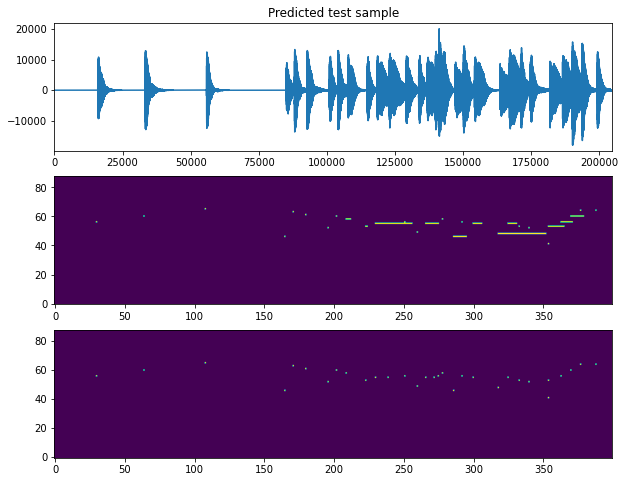

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(311).set_title('Predicted test sample')
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='lower')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='lower')